In [1]:
from data import *
from models import *
from utils import *

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

MAE_DIR = '/home/neelamlab/ninad/MAE'
ROOT_DIR = '/data/ninad/DATASET_linear'
LABEL_DIR = f'/data/ninad/Metadata'
RESULT_DIR = f'{MAE_DIR}/results'
LOG_DIR = f'{MAE_DIR}/logs/'
TASK = 'regression'
CDRGLOB = 0.0
ONLY_3T_SCANS = 0.001

NP_SEED = 42
TORCH_SEED = 36
np.random.seed(NP_SEED)
torch.manual_seed(TORCH_SEED)

LOGGER = setup_logger(logs_dir=LOG_DIR)

In [ ]:
RESULT_DIR = 'results'
filename = 'test_predictions_TEST_DATA.csv'
runmetrics = {}
age_threshold = 0
MIN_SEED = 11
MAX_SEED = 20
SKIP_SEED = 21
for run in os.listdir(RESULT_DIR):
    if run[:4]=='SFCN' and MIN_SEED<=int(run.split('_')[-1])<=MAX_SEED and int(run.split('_')[-1])!=SKIP_SEED:
        print(run)
        for fold in range(5):
            # print(os.path.join(RESULT_DIR, run, f'fold_{fold}',filename))
            if os.path.exists(os.path.join(RESULT_DIR, run, f'fold_{fold}',filename)):
                true, predicted = [],[]
                for dataset_name, _, i,j in pd.read_csv(os.path.join(RESULT_DIR, run, f'fold_{fold}', filename)).values:
                    if True: #dataset_name == 'CBR': #dataset_name != 'CBR' and dataset_name != 'LASI': #dataset_name == 'CBR': #
                        if i < age_threshold:
                            continue
                        true.append(i)
                        predicted.append(j)
                # plot_brain_age_delta(true, predicted, name=f'{run} TEST')
                runmetrics[f'{run}_f{fold}'] = {}
                runmetrics[f'{run}_f{fold}']['F1'] = f1_score(true,predicted)
                runmetrics[f'{run}_f{fold}']['Acc'] = accuracy_score(true,predicted)
                runmetrics[f'{run}_f{fold}']['Precision'] = precision_score(true,predicted)
                runmetrics[f'{run}_f{fold}']['Recall'] = recall_score(true,predicted)

SFCN_seed_12
results/SFCN_seed_12/fold_0/test_predictions_TEST_DATA.csv
results/SFCN_seed_12/fold_1/test_predictions_TEST_DATA.csv
results/SFCN_seed_12/fold_2/test_predictions_TEST_DATA.csv
results/SFCN_seed_12/fold_3/test_predictions_TEST_DATA.csv
results/SFCN_seed_12/fold_4/test_predictions_TEST_DATA.csv
SFCN_seed_15
results/SFCN_seed_15/fold_0/test_predictions_TEST_DATA.csv
results/SFCN_seed_15/fold_1/test_predictions_TEST_DATA.csv
results/SFCN_seed_15/fold_2/test_predictions_TEST_DATA.csv
results/SFCN_seed_15/fold_3/test_predictions_TEST_DATA.csv
results/SFCN_seed_15/fold_4/test_predictions_TEST_DATA.csv
SFCN2_seed_20
results/SFCN2_seed_20/fold_0/test_predictions_TEST_DATA.csv
results/SFCN2_seed_20/fold_1/test_predictions_TEST_DATA.csv
results/SFCN2_seed_20/fold_2/test_predictions_TEST_DATA.csv
results/SFCN2_seed_20/fold_3/test_predictions_TEST_DATA.csv
results/SFCN2_seed_20/fold_4/test_predictions_TEST_DATA.csv
SFCN_seed_11
results/SFCN_seed_11/fold_0/test_predictions_TEST_DATA.cs

In [36]:
df = pd.DataFrame.from_dict(runmetrics).T
mean_values = df.mean().round(4)
std_values = df.std().round(4)
mean_std = mean_values.astype(str) + " ± " + std_values.astype(str)
# df.loc['mean ± std'] = mean_std
df.head()

,F1,Acc,Precision,Recall
SFCN_seed_12_f0,0.945813,0.937143,0.914286,0.979592
SFCN_seed_12_f1,0.948454,0.942857,0.958333,0.938776
SFCN_seed_12_f2,0.943005,0.937143,0.957895,0.928571
SFCN_seed_12_f3,0.942408,0.937143,0.967742,0.918367
SFCN_seed_12_f4,0.940594,0.931429,0.913462,0.969388


In [40]:
# Correcting the code
df['Seed'] = df.index.to_series().apply(lambda x: '_'.join(x.split('_')[:3]))

# Group by the 'Seed' column and aggregate
summary_df = df.groupby('Seed').agg({
    'F1': ['mean', 'std'], 
    'Acc': ['mean', 'std'], 
    'Precision': ['mean', 'std'], 
    'Recall': ['mean', 'std']
})

# Flatten the MultiIndex columns
summary_df.columns = ['_'.join(col) for col in summary_df.columns]

summary_df = summary_df.reset_index()

summary_df

,Seed,F1_mean,F1_std,Acc_mean,Acc_std,Precision_mean,Precision_std,Recall_mean,Recall_std
0,SFCN2_seed_20,0.913367,0.026839,0.902857,0.025234,0.932184,0.023387,0.899010,0.070846
1,SFCN_seed_11,0.927080,0.018121,0.923429,0.015959,0.965640,0.026388,0.893750,0.049630
2,SFCN_seed_12,0.944055,0.003091,0.937143,0.004041,0.942343,0.026287,0.946939,0.026413
3,SFCN_seed_13,0.942291,0.005407,0.934857,0.005111,0.953371,0.013389,0.932000,0.022804
4,SFCN_seed_14,0.907314,0.007806,0.890286,0.012388,0.880019,0.033069,0.938000,0.026833
5,SFCN_seed_15,0.915475,0.010108,0.902857,0.014569,0.914404,0.036732,0.918000,0.021679


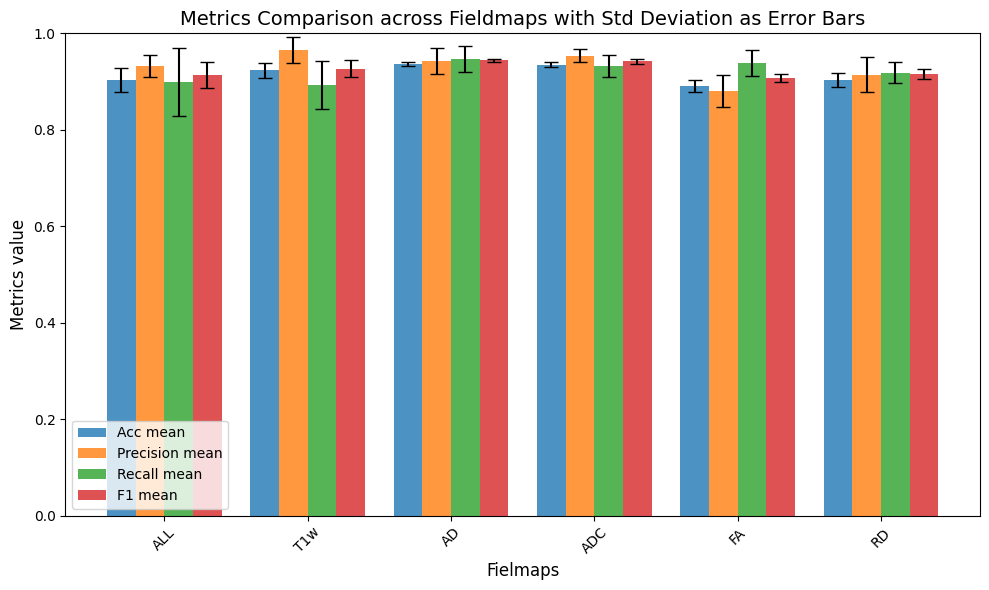

In [52]:
metrics = ['Acc_mean', 'Precision_mean', 'Recall_mean', 'F1_mean']
std_metrics = ['Acc_std', 'Precision_std', 'Recall_std', 'F1_std']
x = np.arange(len(df['Seed']))  # Positions for the groups
width = 0.2  # Width of each bar
new_labels = ["ALL", "T1w", "AD", "ADC", "FA", "RD"]

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.bar(
        x + i * width, 
        summary_df[metric], 
        yerr=df[std_metrics[i]], 
        capsize=5, 
        width=width, 
        label=metric.replace('_', ' '), 
        alpha=0.8
    )

plt.xlabel('Fielmaps', fontsize=12)
plt.ylabel('Metrics value', fontsize=12)
plt.title('Metrics Comparison across Fieldmaps with Std Deviation as Error Bars', fontsize=14)
plt.xticks(x + width * (len(metrics) - 1) / 2, new_labels, rotation=45, fontsize=10)
plt.ylim(0, 1)  # Assuming metrics are normalized
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()